In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
#Read dataset to pandas dataframe
dataset = pd.read_excel('/content/drive/MyDrive/MTP_FINAL/Dataset-3.xlsx', sheet_name='IOCCG_simulated')

In [ ]:
#breaking down the dataset into x feature and y target
dataset_y = dataset['Chlorophyll']
dataset_x = dataset.drop(['Chlorophyll'],axis=1)

,400,410,420,430,440,450,460,470,480,490,...,710,720,730,740,750,760,770,780,790,800
0,0.015468,0.016338,0.015585,0.014308,0.012539,0.010416,0.009906,0.009398,0.008280,0.007162,...,0.000064,0.000040,0.000027,0.000020,0.000018,0.000017,0.000017,0.000017,0.000018,0.000019
1,0.009214,0.009727,0.009511,0.009092,0.008288,0.007286,0.007121,0.006931,0.006297,0.005528,...,0.000050,0.000031,0.000021,0.000016,0.000014,0.000013,0.000013,0.000013,0.000014,0.000014
2,0.011594,0.012039,0.011659,0.011009,0.010000,0.008701,0.008436,0.008066,0.007203,0.006347,...,0.000060,0.000038,0.000025,0.000019,0.000017,0.000016,0.000016,0.000016,0.000017,0.000018
3,0.012409,0.013388,0.013469,0.013196,0.012331,0.011018,0.010971,0.010771,0.009786,0.008728,...,0.000081,0.000051,0.000035,0.000026,0.000023,0.000022,0.000022,0.000022,0.000023,0.000024
4,0.012849,0.013552,0.012991,0.012189,0.010740,0.009073,0.008725,0.008292,0.007382,0.006367,...,0.000054,0.000033,0.000023,0.000017,0.000015,0.000014,0.000014,0.000014,0.000015,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.001000,0.001175,0.001378,0.001606,0.001880,0.002234,0.002694,0.003290,0.004023,0.004828,...,0.007221,0.004664,0.003048,0.002233,0.002146,0.002074,0.002113,0.002265,0.002504,0.002623
496,0.001032,0.001159,0.001303,0.001453,0.001632,0.001861,0.002119,0.002438,0.002806,0.003192,...,0.006039,0.004108,0.002761,0.002051,0.001977,0.001916,0.001955,0.002096,0.002317,0.002429
497,0.001250,0.001332,0.001422,0.001506,0.001617,0.001802,0.002030,0.002322,0.002644,0.002957,...,0.003205,0.002150,0.001458,0.001095,0.001056,0.001025,0.001044,0.001114,0.001225,0.001281
498,0.002743,0.003021,0.003328,0.003648,0.004029,0.004601,0.005153,0.005769,0.006582,0.007460,...,0.007551,0.004953,0.003265,0.002401,0.002312,0.002239,0.002286,0.002455,0.002720,0.002856


In [ ]:
#splitting the data
y = dataset_y
X_train, X_test, y_train, y_test = train_test_split(dataset_x, y, test_size=0.3, random_state=42)

                                      **LINEAR** **REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(X_train, y_train)
r_sq = model_lr.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_lr.intercept_}")
print(f"coefficients: {model_lr.coef_}")
y_predicted_lr = model_lr.predict(X_test)

coefficient of determination: 0.9749539065766175
intercept: -2.5573924080171624
coefficients: [-4.59098360e+02 -3.99471701e+02  3.26030563e+03 -1.94089877e+03
 -3.96985788e+03  3.00324938e+03  3.57400962e+02  2.11620460e+03
  1.71624573e+03 -7.53218417e+03  7.18354277e+03 -4.96869597e+03
 -7.68680529e+03  1.33522093e+04 -9.76192867e+03  8.20147480e+03
  5.81099005e+03 -1.28563075e+04  4.03171510e+03  7.36518836e+03
 -1.33178120e+04 -4.04153868e+03  5.39353711e+03 -4.34232469e+03
 -1.89331756e+03  8.22492961e+03 -2.52074985e+03 -5.38834224e+03
 -2.57435317e+04  3.46144468e+04  5.28101093e+04 -4.62193048e+05
  1.44126330e+06  1.63403296e+06 -4.73639586e+06 -6.82923401e+06
 -4.57211404e+06  1.85687570e+07  1.00720031e+07 -2.05057547e+07
  5.78116695e+06]


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

1.8839000944046211
0.9596141946290534
1.1185328393676313
2.26828868734269


                                  **Gradient** **Boosting** **Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
y_predicted_gb = model_gb.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gb))
print(rms)
r_square = model_gb.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gb)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gb)
print(mape)

2.4185732952217354
0.9334372097671791
1.278230633391875
0.6020327210290585


In [ ]:
#Hyperparameter tuning
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 0.5}

In [ ]:
GBR2 = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.01,subsample=0.5,max_depth=4,random_state=1)
model_gbhp = GBR2.fit(X_train, y_train)
y_predicted_gbhp = model_gbhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gbhp))
print(rms)
r_square = model_gbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gbhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gbhp)
print(mape)

2.1429994268404586
0.9477414780800154
1.1968828725890295
0.3895011754660333


                                      **PLS** **Regression**

In [ ]:
from sklearn.cross_decomposition import PLSRegression
model_plsr = PLSRegression(n_components=41, scale=True)
model_plsr.fit(X_train, y_train)
y_predicted_plsr = model_plsr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_plsr))
print(rms)
r_square = model_plsr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_plsr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_plsr)
print(mape)

1.8839000944031539
0.9596141946291163
1.1185328393683092
2.26828868735363


In [ ]:
#Hyperparameter Tuning
r_square = []
rms = [] #to store rmse values for different n_components
mae = []
mape = []
for n_comp in range(1, 41):
  model_plsrhp = PLSRegression(n_components=n_comp, scale=True)
  model_plsrhp.fit(X_train, y_train)
  y_predicted_plsrhp = model_plsrhp.predict(X_test)
  rms_val = sqrt(mean_squared_error(y_test,y_predicted_plsrhp)) #calculate rmse
  rms.append(rms_val) #store rmse values
  r2 = model_plsrhp.score(X_test,y_test)
  r_square.append(r2) #store r2 values
  mae_1 = mean_absolute_error(y_test,y_predicted_gbhp)
  mae.append(mae_1)
  mape_1 = mean_absolute_percentage_error(y_test, y_predicted_gbhp)
  mape.append(mape_1)


In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

1.7237636135411596
0.9661881891841494
1.1968828725890295
0.3895011754660333


                                **Random** **Forset**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators = 500)
model_rfr.fit(X_train,y_train)
y_predicted_rfr = model_rfr.predict(X_test)                          

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfr))
print(rms)
r_square = model_rfr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfr)
print(mape)

2.191385865685305
0.9453549629819444
1.1856762666666665
0.29188598412698413


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],'max_depth': [80, 90, 100, 110],'max_features': [2, 3],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_rfrhp = grid_search.best_estimator_
model_rfrhp.fit(X_train,y_train)
y_predicted_rfrhp = model_rfrhp.predict(X_test)   

Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfrhp))
print(rms)
r_square = model_rfrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfrhp)
print(mape)

2.5367352866010253
0.9267743370300319
1.3690633158451573
0.34389125819530353


                                    **KNN**

In [ ]:
from sklearn import neighbors
r_square = []
rms = [] #to store rmse values for different k
mae = []
mape = []
for K in range(20):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    y_predicted_knn = model_knn.predict(X_test) #make prediction on test set
    rms_val = sqrt(mean_squared_error(y_test,y_predicted_knn)) #calculate rmse
    rms.append(rms_val) #store rmse values
    r2 = model_knn.score(X_test,y_test)
    r_square.append(r2) #store r2 values
    mae_1 = mean_absolute_error(y_test,y_predicted_knn)
    mae.append(mae_1)
    mape_1 = mean_absolute_percentage_error(y_test, y_predicted_knn)
    mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

3.14045266847997
0.8877729578581656
1.580333333333333
0.33485396825396824


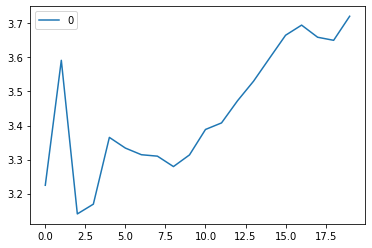

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rms) #elbow curve 
curve.plot()

                                        **SVR**

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


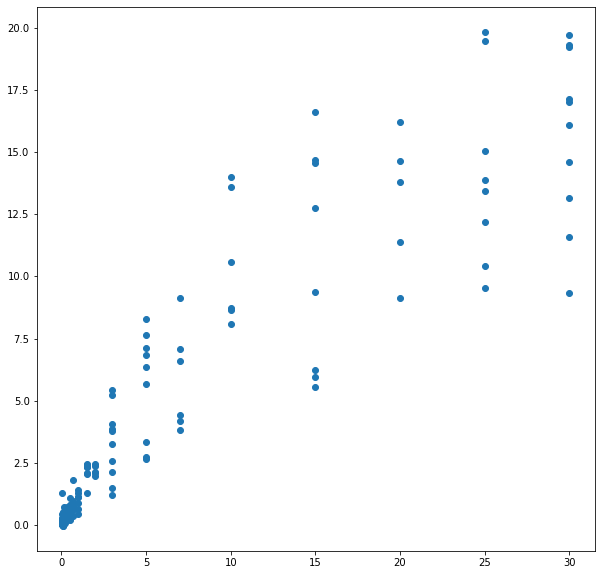

In [ ]:
from sklearn.svm import SVR
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)
y_predicted_svr = model_svr.predict(X_test)
plt.figure(figsize = (10,10))
plt.scatter(y_test,y_predicted_svr)
print(model_svr.get_params())

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svr))
print(rms)
r_square = model_svr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svr)
print(mape)

5.084983779013794
0.7057664742025607
2.4996012570806863
1.0898762466407363


In [ ]:
#Hyperparameter Tuning
c_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-2, 2, 5)
parameters = {'kernel': ['rbf','poly'], 'C': c_range,'gamma': gamma_range,'epsilon':[1000,100,10,1,0.1,0.01]}
svr = SVR()
grid_search = GridSearchCV(svr, parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'C': 100.0, 'epsilon': 1, 'gamma': 100.0, 'kernel': 'rbf'}


In [ ]:
model_svrhp = grid_search.best_estimator_
model_svrhp.fit(X_train,y_train)
y_predicted_svrhp = model_svrhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svrhp))
print(rms)
r_square = model_svrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svrhp)
print(mape)

3.638902639103664
0.8493205993367713
2.067573134441796
3.273575458933324


                                         **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model_abr = adb.fit(X_train, y_train)
y_predicted_abr = model_abr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abr))
print(rms)
r_square = model_abr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abr)
print(mape)

2.9786064489303063
0.8990423429777452
2.279130235324555
8.948325804046926


In [ ]:
#Hyperparametrer Tuning
param_grid = {'n_estimators':list(range(0, 1000, 100)), 'learning_rate':[100,10,1,0.1, 0.01, 0.001]}
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=1, cv=5)

In [ ]:
#fit the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_adbhp = grid_search.best_estimator_
model_adbhp.fit(X_train,y_train)
y_predicted_abrhp = model_adbhp.predict(X_test)   

{'learning_rate': 0.1, 'n_estimators': 300}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abrhp))
print(rms)
r_square = model_adbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abrhp)
print(mape)

2.8665843950521155
0.906493354561137
2.145127685062103
8.73608489177908


                                   **Ridge & Lasso** **Regression**

In [ ]:
#Ridge Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regression.best_params_)

{'alpha': 1e-15}


In [ ]:
model_rr = Ridge(alpha=1e-15).fit(X_train,y_train)
y_predicted_rr = model_rr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rr))
print(rms)
r_square = model_rr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rr)
print(mape)

1.881057024713002
0.9597359983489756
1.1174658243377584
2.270867818635717


In [ ]:
#Lasso Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)

{'alpha': 1e-08}


In [ ]:
model_lr = Lasso(alpha=1e-08).fit(X_train,y_train)
y_predicted_lr = model_lr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

2.8516838907419597
0.9074629230827325
2.045229410252651
6.96938781118769


                                                      **ANN**                                                

In [ ]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
input_unit = 41
hidden_units2 = 24
learning_rate = 0.1
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(input_unit, kernel_initializer='normal', activation='relu'),
    Dropout(0.4),
    # Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train.values, 
    y_train.values, 
    epochs=150, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/150
5/5 [==============================] - 1s 55ms/step - loss: 2.0109 - mean_squared_logarithmic_error: 1.9460 - val_loss: 1.3024 - val_mean_squared_logarithmic_error: 1.3218
Epoch 2/150
5/5 [==============================] - 0s 10ms/step - loss: 1.4581 - mean_squared_logarithmic_error: 1.5044 - val_loss: 1.3733 - val_mean_squared_logarithmic_error: 1.4473
Epoch 3/150
5/5 [==============================] - 0s 8ms/step - loss: 1.2803 - mean_squared_logarithmic_error: 1.2203 - val_loss: 1.1488 - val_mean_squared_logarithmic_error: 1.1230
Epoch 4/150
5/5 [==============================] - 0s 9ms/step - loss: 1.2110 - mean_squared_logarithmic_error: 1.1904 - val_loss: 1.1379 - val_mean_squared_logarithmic_error: 1.0823
Epoch 5/150
5/5 [==============================] - 0s 9ms/step - loss: 1.0758 - mean_squared_logarithmic_error: 1.0532 - val_loss: 0.9012 - val_mean_squared_logarithmic_error: 0.8979
Epoch 6/150
5/5 [==============================] - 0s 9ms/step - loss: 0.8789 - mea

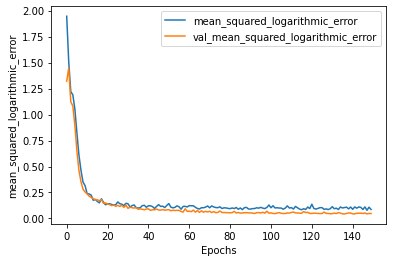

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
rmse = math.sqrt(mse)
print(rmse)
r2 = r2_score(y_test, Y_pred)
print(r2)
mae = mean_absolute_error(y_test,Y_pred)
print(mae)
mape = mean_absolute_percentage_error(y_test, Y_pred)
print(mape)

3.9756465467740645
0.8201425028695182
1.9539838268836338
1.1964189189333763
